In [1]:
import dill
import matplotlib.pyplot as plt

from experiments import ylim

In [8]:
def plot(all_stats):
    # clear plot and calc nrows
    plt.clf()
    n = 2
    nrows = n
    fig, ax = plt.subplots(nrows, 2, figsize=(16, 6 * nrows))

    # plot stats
    for i, (method, stats) in enumerate(all_stats.items()):
        if stats is None: 
            print('WARNING: {} had no stats'.format(method))
            continue
        stats.plot(ax[0, 0], 'xs', label=method)
#         stats.plot(ax[0, 1], 'ws', label=method)
        stats.plot(ax[0, 1], 'us', label=method)
        if 'costs' in stats:
            stats.plot(ax[1, 1], 'avg costs', label=method)
            stats.plot(ax[1, 0], 'costs', label=method)
        else:
            stats.plot(ax[1, 1], 'avg fs', label=method)
            stats.plot(ax[1, 0], 'fs', label=method)
    
    # (note: `ylim()` is so useful! because sometimes one thing blows up and then autoscale messes up all plots)
    _ax = ax[0, 0]; _ax.set_title('State'); _ax.legend(); ylim(_ax, -5, 20)
    _ax = ax[0, 1]; _ax.set_title('Control'); _ax.legend(); ylim(_ax, -0.5, 0.5)
    _ax = ax[1, 1]; _ax.set_title('Average Costs'); _ax.legend(); ylim(_ax, -5, 100)
    _ax = ax[1, 0]; _ax.set_title('Instantaneous Costs'); _ax.legend(); ylim(_ax, -0.05, 1.)
    pass

<Figure size 640x480 with 0 Axes>

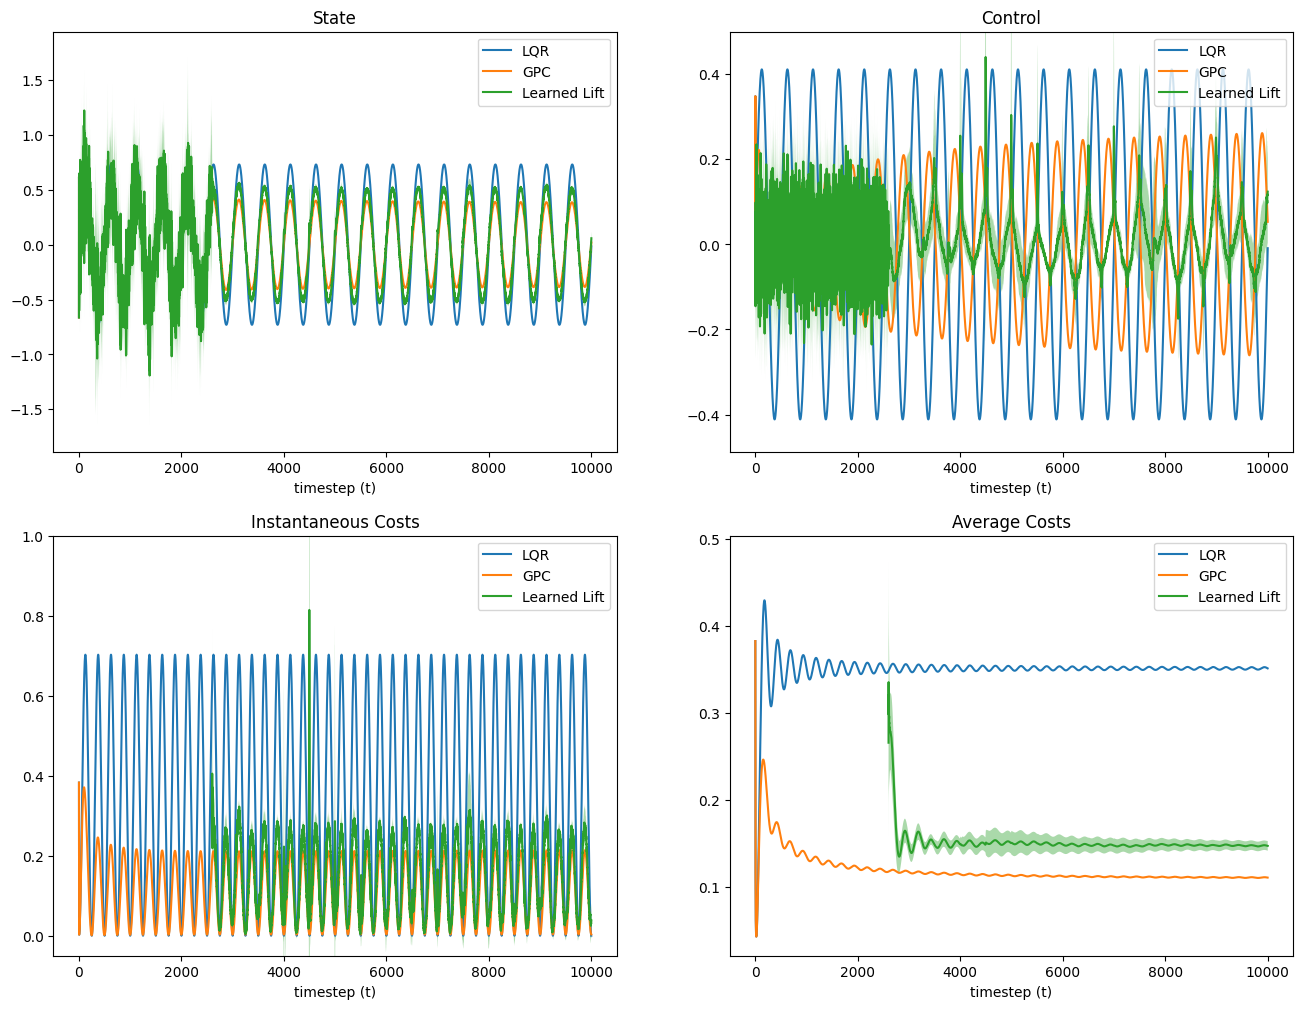

In [16]:
name = 'lds_sinusoidal'

keys_to_plot = ['LQR', 'GPC', 'Learned Lift']

with open('../logs/{}.pkl'.format(name), 'rb') as f:
    args, stats = dill.load(f)

keys_to_remove = []
for k in stats.keys():
    if k not in keys_to_plot: keys_to_remove.append(k)
for k in keys_to_remove: del stats[k]
plot(stats)
plt.savefig('../plots/{}.png'.format(name))